In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
show_data = pd.DataFrame()
for i in range(1,8):
    season_URL = rf'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_{i}%29'
    season_page = pd.read_html(season_URL,header=0)
    season_data = season_page[1]
    season_data.fillna(method='backfill',inplace=True)
    season_data.rename(columns={'Unnamed: 7':'Description'},inplace=True)
    season_info = season_data.iloc[0::2].copy()
    season_info.set_index('No.overall',inplace=True)
    season_info.iloc[:,5] = season_info.iloc[:,5].str.split('[').str[0].astype('float')
    season_info['Original air date']=season_info['Original air date'].str.extract(r'(\w+\s\d{1,2},\s\d{4})').apply(pd.to_datetime)
    show_data = pd.concat([show_data,season_info])

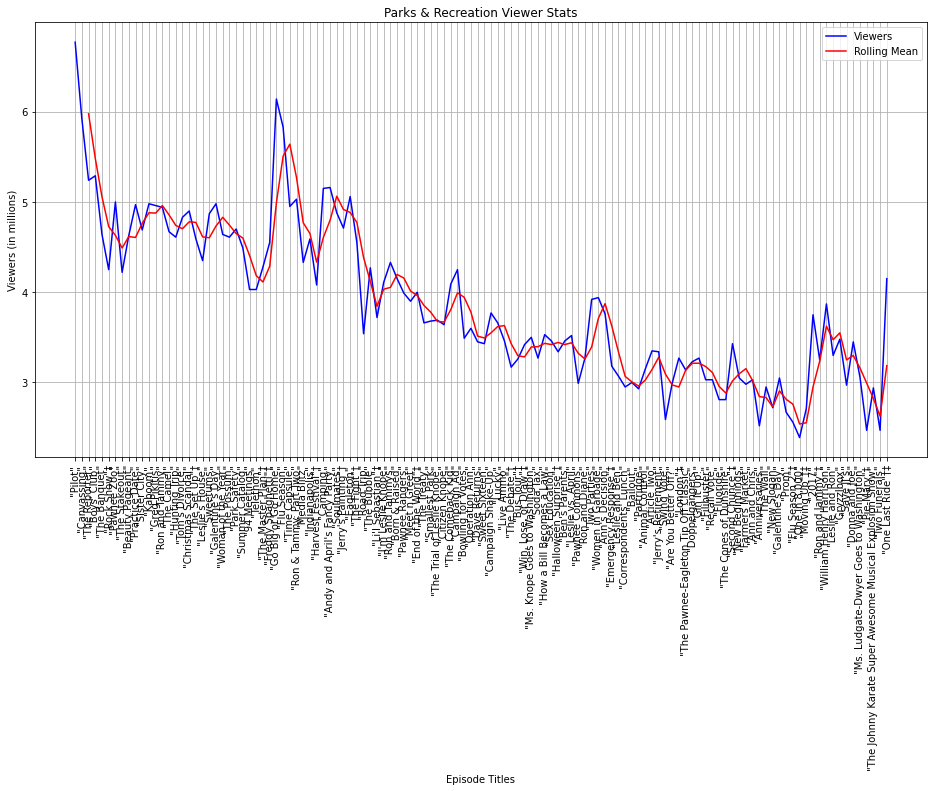

In [5]:
episode_titles = show_data.iloc[:,1].values
episode_viewers = show_data.iloc[:,5].values

index = np.arange(len(show_data))

plt.figure(num=None, figsize=(16, 8), facecolor='w', edgecolor='k')
plt.xlabel('Episode Titles')
plt.title('Parks & Recreation Viewer Stats')
plt.xticks(index,episode_titles,rotation=90)
plt.ylabel('Viewers (in millions)')
plt.plot(index, episode_viewers,'b',label='Viewers')
plt.plot(pd.Series(episode_viewers).rolling(window=3).mean(),'r',label='Rolling Mean')
plt.grid()

plt.legend()
plt.show()